# Analisis Integrado - Parte 3

ANÁLISIS INTEGRADO: PROYECCIÓN 12 MESES CON COLLECTIONS

=== CONFIGURACIÓN DE PRODUCTOS (MISMA QUE PARTE 1) ===
✅ Productos configurados con motor de collections
Collections configuradas:
  • Solo aplicadas a Contigo A
  • Segmentación optimizada (top 21.2% de clientes)
  • Tasa de éxito esperada: 94.4%
  • Costo por llamada: $30

=== EJECUTANDO PROYECCIÓN 12 MESES CON COLLECTIONS ===

📊 PRIMEROS 3 MESES - VISTA DETALLADA:
    mes  net_income  net_income_sin_collections  rentabilidad_A  \
0     1    -86440.0                   -236250.0        127850.0   
1     2    -98452.0                   -286312.0        160388.0   
2     3   -113163.0                   -347973.0        200487.0   
3     4   -129996.0                   -424076.0        251184.0   
4     5   -150263.0                   -518143.0        314263.0   
5     6   -174904.0                   -634474.0        392546.0   
6     7   -203863.0                   -778613.0        490967.0   
7     8   -238327.0                  

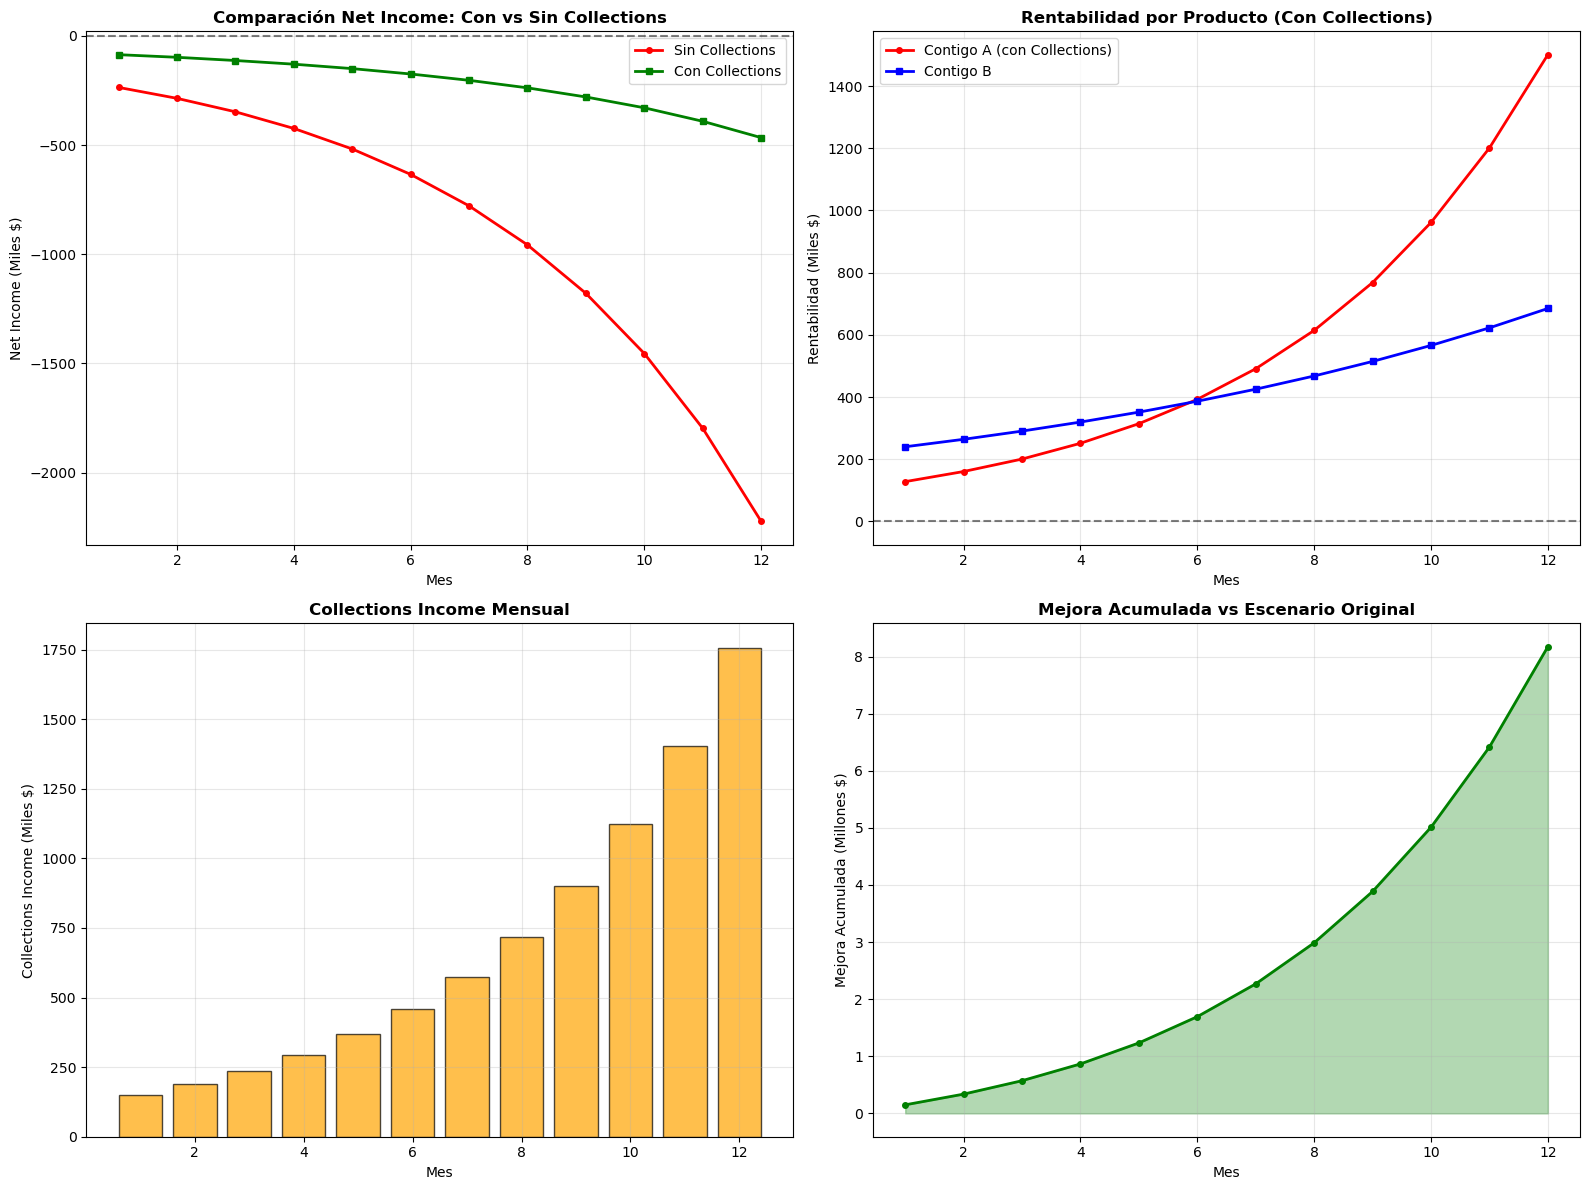


ANÁLISIS DETALLADO DE COLLECTIONS PERFORMANCE

PERFORMANCE DE COLLECTIONS (Contigo A) - Primeros 6 meses:
------------------------------------------------------------------------------------------
Mes  DQ Total  Llamados  Recuper.  Tasa %   Income     Costo   
------------------------------------------------------------------------------------------
1    675       143       134       93.7     $149,810   $4,290  
2    843       178       168       94.4     $187,860   $5,340  
3    1054      223       210       94.2     $234,810   $6,690  
4    1318      279       263       94.3     $294,080   $8,370  
5    1647      349       329       94.3     $367,880   $10,470 
6    2059      436       411       94.3     $459,570   $13,080 
7    2574      545       514       94.3     $574,750   $16,350 
8    3218      682       643       94.3     $718,990   $20,460 
9    4023      852       804       94.4     $899,040   $25,560 
10   5029      1066      1006      94.4     $1,124,920 $31,980 
11   62

In [14]:
# Notebook 3: Proyección 12 Meses con Collections - Análisis Integrado

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import Dict, List, Tuple

# Configuración básica para gráficos
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 10

print("="*80)
print("ANÁLISIS INTEGRADO: PROYECCIÓN 12 MESES CON COLLECTIONS")
print("="*80)

# =====================================================================================
# SECCIÓN 1: CLASES BASE (Copiadas de los notebooks anteriores)
# =====================================================================================

class ProductoCredito:
    """Clase base para productos de crédito"""
    
    def __init__(self, nombre: str, monto_prestamo: float, tasa_interes: float, 
                 tasa_dq: float, clientes_iniciales: int, tasa_crecimiento_mensual: float):
        self.nombre = nombre
        self.monto_prestamo = monto_prestamo
        self.tasa_interes = tasa_interes
        self.tasa_dq = tasa_dq
        self.clientes_iniciales = clientes_iniciales
        self.tasa_crecimiento_mensual = tasa_crecimiento_mensual
        
    def calcular_clientes_mes(self, mes: int) -> int:
        return int(self.clientes_iniciales * (1 + self.tasa_crecimiento_mensual) ** mes)
    
    def calcular_revenue_mes(self, clientes: int) -> float:
        clientes_que_pagan = clientes * (1 - self.tasa_dq)
        return clientes_que_pagan * self.monto_prestamo * self.tasa_interes
    
    def calcular_losses_mes(self, clientes: int) -> float:
        clientes_dq = clientes * self.tasa_dq
        return clientes_dq * self.monto_prestamo  # Solo capital

class StartupFintech:
    """
    Clase principal que modela la operación completa de la startup
    """
    
    def __init__(self, productos: List[ProductoCredito], costo_operativo_por_cuenta: float):
        self.productos = productos
        self.costo_operativo_por_cuenta = costo_operativo_por_cuenta
        self.proyeccion = None
        
    def calcular_proyeccion_mensual(self, periodo_meses: int) -> pd.DataFrame:
        """
        Genera la proyección financiera mes a mes
        """
        resultados = []
        
        for mes in range(periodo_meses):
            mes_data = {'mes': mes + 1}
            
            # Métricas por producto
            total_clientes = 0
            total_revenue = 0
            total_losses = 0
            
            for producto in self.productos:
                clientes_mes = producto.calcular_clientes_mes(mes)
                revenue_mes = producto.calcular_revenue_mes(clientes_mes)
                losses_mes = producto.calcular_losses_mes(clientes_mes)
                
                # Guardar métricas del producto
                mes_data[f'clientes_{producto.nombre}'] = clientes_mes
                mes_data[f'revenue_{producto.nombre}'] = revenue_mes
                mes_data[f'losses_{producto.nombre}'] = losses_mes
                
                # Sumar a totales
                total_clientes += clientes_mes
                total_revenue += revenue_mes
                total_losses += losses_mes
            
            # Cálculos totales del mes
            costos_operativos = total_clientes * self.costo_operativo_por_cuenta
            net_income = total_revenue - total_losses - costos_operativos
            
            mes_data.update({
                'total_clientes': total_clientes,
                'total_revenue': total_revenue,
                'total_losses': total_losses,
                'costos_operativos': costos_operativos,
                'net_income': net_income
            })
            
            resultados.append(mes_data)
        
        self.proyeccion = pd.DataFrame(resultados)
        return self.proyeccion
    
    def mostrar_resumen_productos(self):
        """Muestra un resumen de los productos configurados"""
        print("=== PRODUCTOS CONFIGURADOS ===")
        for producto in self.productos:
            print(producto)
        print(f"\nCosto operativo por cuenta: ${self.costo_operativo_por_cuenta}")

class CollectionsEngine:
    """Motor de collections para recuperar cuentas DQ"""
    
    def __init__(self, contactability_scores_promedio=0.419, prob_pago_contactado=0.75, costo_llamada=30):
        self.contactability_scores_promedio = contactability_scores_promedio
        self.prob_pago_contactado = prob_pago_contactado
        self.costo_llamada = costo_llamada
        
        # Configuración de segmentación optimizada (basada en análisis Parte 2)
        self.usar_segmentacion = True
        self.porcentaje_clientes_high_score = 0.212  # Top 21.2%
        
    def ejecutar_campana(self, clientes_dq: int, monto_prestamo: float) -> Dict:
        """Ejecuta campaña de collections para clientes DQ"""
        
        if self.usar_segmentacion:
            # Solo llamar a clientes con high score (segmentación optimizada)
            clientes_a_llamar = int(clientes_dq * self.porcentaje_clientes_high_score)
            tasa_exito_esperada = 0.944  # Del análisis de segmentación 0.7-1.0
        else:
            # Llamar a todos los clientes DQ
            clientes_a_llamar = clientes_dq
            tasa_exito_esperada = 0.416  # Tasa promedio
        
        # Simular resultados de collections
        cuentas_recuperadas = int(clientes_a_llamar * tasa_exito_esperada)
        
        # Calcular KPIs
        deuda_total_recuperada = cuentas_recuperadas * (monto_prestamo * (1 + 0.15))  # Capital + interés
        revenue_adicional = cuentas_recuperadas * monto_prestamo * 0.15  # Solo interés es revenue
        losses_evitadas = cuentas_recuperadas * monto_prestamo  # Capital salvado
        costo_campana = clientes_a_llamar * self.costo_llamada
        collections_income = deuda_total_recuperada - costo_campana
        
        return {
            'clientes_dq_originales': clientes_dq,
            'clientes_llamados': clientes_a_llamar,
            'cuentas_recuperadas': cuentas_recuperadas,
            'tasa_exito': cuentas_recuperadas / clientes_a_llamar if clientes_a_llamar > 0 else 0,
            'deuda_recuperada': deuda_total_recuperada,
            'revenue_adicional': revenue_adicional,
            'losses_evitadas': losses_evitadas,
            'costo_campana': costo_campana,
            'collections_income': collections_income,
            'clientes_dq_restantes': clientes_dq - cuentas_recuperadas
        }


class StartupFintechConCollections:
    """Startup con capacidad de collections integrada"""
    
    def __init__(self, productos: List[ProductoCredito], costo_operativo_por_cuenta: float):
        self.productos = productos
        self.costo_operativo_por_cuenta = costo_operativo_por_cuenta
        self.collections_engine = CollectionsEngine()
        self.proyeccion = None
        
    def calcular_proyeccion_con_collections(self, periodo_meses: int) -> pd.DataFrame:
        """Proyección mensual CON collections aplicadas a Contigo A"""
        
        resultados = []
        
        for mes in range(periodo_meses):
            mes_data = {'mes': mes + 1}
            
            total_clientes = 0
            total_revenue = 0
            total_losses = 0
            total_revenue_sin_collections = 0  
            total_losses_sin_collections = 0    
            total_collections_income = 0
            total_costo_collections = 0
            
            for producto in self.productos:
                clientes_mes = producto.calcular_clientes_mes(mes)
                
                # Calcular métricas base (sin collections)
                revenue_base = producto.calcular_revenue_mes(clientes_mes)
                losses_base = producto.calcular_losses_mes(clientes_mes)

                # Acumular totales SIN collections
                total_revenue_sin_collections += revenue_base
                total_losses_sin_collections += losses_base
                
                # Aplicar collections solo a Contigo A
                if producto.nombre == "A":
                    clientes_dq = int(clientes_mes * producto.tasa_dq)
                    
                    if clientes_dq > 0:
                        resultados_collections = self.collections_engine.ejecutar_campana(
                            clientes_dq, producto.monto_prestamo
                        )
                        
                        # Ajustar métricas con collections
                        revenue_final = revenue_base + resultados_collections['revenue_adicional']
                        losses_final = losses_base - resultados_collections['losses_evitadas']
                        collections_income = resultados_collections['collections_income']
                        costo_collections = resultados_collections['costo_campana']
                        
                        # Guardar métricas detalladas de collections
                        mes_data[f'collections_clientes_dq_{producto.nombre}'] = clientes_dq
                        mes_data[f'collections_llamados_{producto.nombre}'] = resultados_collections['clientes_llamados']
                        mes_data[f'collections_recuperadas_{producto.nombre}'] = resultados_collections['cuentas_recuperadas']
                        mes_data[f'collections_tasa_exito_{producto.nombre}'] = resultados_collections['tasa_exito']
                        mes_data[f'collections_income_{producto.nombre}'] = collections_income
                        mes_data[f'collections_costo_{producto.nombre}'] = costo_collections
                    else:
                        revenue_final = revenue_base
                        losses_final = losses_base
                        collections_income = 0
                        costo_collections = 0
                else:
                    # Contigo B sin collections
                    revenue_final = revenue_base
                    losses_final = losses_base
                    collections_income = 0
                    costo_collections = 0
                
                # Guardar métricas del producto
                mes_data[f'clientes_{producto.nombre}'] = clientes_mes
                mes_data[f'revenue_{producto.nombre}'] = revenue_final
                mes_data[f'losses_{producto.nombre}'] = losses_final
                mes_data[f'rentabilidad_{producto.nombre}'] = revenue_final - losses_final
                
                # Sumar a totales
                total_clientes += clientes_mes
                total_revenue += revenue_final
                total_losses += losses_final
                total_collections_income += collections_income
                total_costo_collections += costo_collections
            
            # Cálculos totales del mes
            costos_operativos = total_clientes * self.costo_operativo_por_cuenta
            costos_totales = costos_operativos + total_costo_collections
            net_income = total_revenue - total_losses - costos_totales
            
            mes_data.update({
                'total_clientes': total_clientes,
                'total_revenue': total_revenue,
                'total_losses': total_losses,
                'costos_operativos': costos_operativos,
                'total_collections_income': total_collections_income,
                'total_costo_collections': total_costo_collections,
                'costos_totales': costos_totales,
                'net_income': net_income,
                'net_income_sin_collections': total_revenue_sin_collections - total_losses_sin_collections - costos_operativos  # Para comparación
            })
            
            resultados.append(mes_data)
        
        self.proyeccion = pd.DataFrame(resultados)
        return self.proyeccion


# =====================================================================================
# SECCIÓN 2: CONFIGURACIÓN Y EJECUCIÓN
# =====================================================================================

print("\n=== CONFIGURACIÓN DE PRODUCTOS (MISMA QUE PARTE 1) ===")

# Productos base (mismos parámetros que Parte 1)
producto_a = ProductoCredito(
    nombre="A",
    monto_prestamo=1000,
    tasa_interes=0.15,
    tasa_dq=0.135,
    clientes_iniciales=5000,
    tasa_crecimiento_mensual=0.25
)

producto_b = ProductoCredito(
    nombre="B", 
    monto_prestamo=2000,
    tasa_interes=0.10,
    tasa_dq=0.08,
    clientes_iniciales=10000,
    tasa_crecimiento_mensual=0.10
)

# Startup con collections integradas
startup_con_collections = StartupFintechConCollections(
    productos=[producto_a, producto_b],
    costo_operativo_por_cuenta=30
)

print("✅ Productos configurados con motor de collections")
print(f"Collections configuradas:")
print(f"  • Solo aplicadas a Contigo A")
print(f"  • Segmentación optimizada (top 21.2% de clientes)")
print(f"  • Tasa de éxito esperada: 94.4%")
print(f"  • Costo por llamada: $30")

# =====================================================================================
# SECCIÓN 3: PROYECCIÓN Y ANÁLISIS
# =====================================================================================

print("\n=== EJECUTANDO PROYECCIÓN 12 MESES CON COLLECTIONS ===")

# Ejecutar proyección
proyeccion_con_collections = startup_con_collections.calcular_proyeccion_con_collections(12)

# Mostrar primeros resultados
print("\n📊 PRIMEROS 3 MESES - VISTA DETALLADA:")
columnas_clave = ['mes', 'net_income', 'net_income_sin_collections', 
                 'rentabilidad_A', 'rentabilidad_B', 'collections_income_A']

print(proyeccion_con_collections[columnas_clave].head(12).round(0))

# =====================================================================================
# SECCIÓN 4: COMPARACIÓN CON ESCENARIO ORIGINAL
# =====================================================================================

print("\n" + "="*60)
print("COMPARACIÓN: CON VS SIN COLLECTIONS")
print("="*60)


startup_original = StartupFintech([
    ProductoCredito("A", 1000, 0.15, 0.135, 5000, 0.25),
    ProductoCredito("B", 2000, 0.10, 0.08, 10000, 0.10)
], 30)

proyeccion_original = startup_original.calcular_proyeccion_mensual(12)

# Crear DataFrame comparativo
comparacion = pd.DataFrame({
    'mes': proyeccion_con_collections['mes'],
    'net_income_original': proyeccion_original['net_income'],
    'net_income_con_collections': proyeccion_con_collections['net_income'],
    'mejora_absoluta': proyeccion_con_collections['net_income'] - proyeccion_original['net_income'],
    'mejora_porcentual': ((proyeccion_con_collections['net_income'] - proyeccion_original['net_income']) / 
                          abs(proyeccion_original['net_income']) * 100).round(1)
})

print("\nIMPACTO MES A MES (Miles de pesos):")
print("-" * 80)
print(f"{'Mes':<4} {'Original':<12} {'Con Collections':<18} {'Mejora $':<12} {'Mejora %':<10}")
print("-" * 80)

for _, row in comparacion.head(12).iterrows():
    print(f"{int(row['mes']):<4} {row['net_income_original']/1000:<12.0f} "
          f"{row['net_income_con_collections']/1000:<18.0f} "
          f"{row['mejora_absoluta']/1000:<12.0f} {row['mejora_porcentual']:<10.0f}%")

print("\n🎯 RESULTADOS FINALES (Mes 12):")
resultado_final_original = proyeccion_original.iloc[-1]['net_income']
resultado_final_collections = proyeccion_con_collections.iloc[-1]['net_income']
mejora_total = resultado_final_collections - resultado_final_original

print(f"Sin Collections:    ${resultado_final_original:,.0f}")
print(f"Con Collections:    ${resultado_final_collections:,.0f}")
print(f"Mejora total:       ${mejora_total:,.0f}")
print(f"Cambio porcentual:  {(mejora_total/abs(resultado_final_original)*100):+.1f}%")

# =====================================================================================
# SECCIÓN 5: VISUALIZACIONES
# =====================================================================================

print("\n=== GENERANDO VISUALIZACIONES COMPARATIVAS ===")

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Net Income: Original vs Con Collections
ax1.plot(comparacion['mes'], comparacion['net_income_original']/1000, 
         'r-', linewidth=2, marker='o', label='Sin Collections', markersize=4)
ax1.plot(comparacion['mes'], comparacion['net_income_con_collections']/1000, 
         'g-', linewidth=2, marker='s', label='Con Collections', markersize=4)
ax1.axhline(y=0, color='black', linestyle='--', alpha=0.5)
ax1.set_title('Comparación Net Income: Con vs Sin Collections', fontweight='bold')
ax1.set_xlabel('Mes')
ax1.set_ylabel('Net Income (Miles $)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Rentabilidad por Producto CON Collections
rentab_a_con = proyeccion_con_collections['rentabilidad_A'] / 1000
rentab_b_con = proyeccion_con_collections['rentabilidad_B'] / 1000

ax2.plot(proyeccion_con_collections['mes'], rentab_a_con, 
         'r-', linewidth=2, marker='o', label='Contigo A (con Collections)', markersize=4)
ax2.plot(proyeccion_con_collections['mes'], rentab_b_con, 
         'b-', linewidth=2, marker='s', label='Contigo B', markersize=4)
ax2.axhline(y=0, color='black', linestyle='--', alpha=0.5)
ax2.set_title('Rentabilidad por Producto (Con Collections)', fontweight='bold')
ax2.set_xlabel('Mes')
ax2.set_ylabel('Rentabilidad (Miles $)')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Collections Income mensual
collections_income_mes = proyeccion_con_collections['total_collections_income'].fillna(0) / 1000
ax3.bar(proyeccion_con_collections['mes'], collections_income_mes, 
        color='orange', alpha=0.7, edgecolor='black')
ax3.set_title('Collections Income Mensual', fontweight='bold')
ax3.set_xlabel('Mes')
ax3.set_ylabel('Collections Income (Miles $)')
ax3.grid(True, alpha=0.3)

# 4. Mejora acumulada vs Original
mejora_acumulada = comparacion['mejora_absoluta'].cumsum() / 1000000  # En millones
ax4.fill_between(comparacion['mes'], 0, mejora_acumulada, 
                 color='green', alpha=0.3, label='Mejora Acumulada')
ax4.plot(comparacion['mes'], mejora_acumulada, 
         'g-', linewidth=2, marker='o', markersize=4)
ax4.set_title('Mejora Acumulada vs Escenario Original', fontweight='bold')
ax4.set_xlabel('Mes')
ax4.set_ylabel('Mejora Acumulada (Millones $)')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =====================================================================================
# SECCIÓN 6: ANÁLISIS DETALLADO DE COLLECTIONS
# =====================================================================================

print("\n" + "="*60)
print("ANÁLISIS DETALLADO DE COLLECTIONS PERFORMANCE")
print("="*60)

# Extraer métricas de collections por mes
collections_metricas = proyeccion_con_collections[
    ['mes', 'collections_clientes_dq_A', 'collections_llamados_A', 
     'collections_recuperadas_A', 'collections_tasa_exito_A', 
     'collections_income_A', 'collections_costo_A']
].fillna(0)

print("\nPERFORMANCE DE COLLECTIONS (Contigo A) - Primeros 6 meses:")
print("-" * 90)
print(f"{'Mes':<4} {'DQ Total':<9} {'Llamados':<9} {'Recuper.':<9} {'Tasa %':<8} {'Income':<10} {'Costo':<8}")
print("-" * 90)

for _, row in collections_metricas.head(12).iterrows():
    tasa = row['collections_tasa_exito_A'] * 100 if row['collections_tasa_exito_A'] > 0 else 0
    print(f"{int(row['mes']):<4} {int(row['collections_clientes_dq_A']):<9} "
          f"{int(row['collections_llamados_A']):<9} {int(row['collections_recuperadas_A']):<9} "
          f"{tasa:<8.1f} ${int(row['collections_income_A']):<9,} ${int(row['collections_costo_A']):<7,}")

# Métricas totales de collections
total_collections_income = collections_metricas['collections_income_A'].sum()
total_collections_costo = collections_metricas['collections_costo_A'].sum()
total_cuentas_recuperadas = collections_metricas['collections_recuperadas_A'].sum()
roi_collections_total = total_collections_income / total_collections_costo if total_collections_costo > 0 else 0

print(f"\n🎯 MÉTRICAS TOTALES COLLECTIONS (12 meses):")
print(f"Total Collections Income:  ${total_collections_income:,.0f}")
print(f"Total Costo Collections:   ${total_collections_costo:,.0f}")
print(f"Total Cuentas Recuperadas: {total_cuentas_recuperadas:,.0f}")
print(f"ROI Collections Total:     {roi_collections_total:.1f}x")

# =====================================================================================
# SECCIÓN 7: RECOMENDACIONES FINALES
# =====================================================================================

print("\n" + "="*80)
print("RECOMENDACIONES ESTRATÉGICAS FINALES")
print("="*80)

print("\n🚀 CONCLUSIÓN PRINCIPAL:")
print("Collections transforma completamente la viabilidad del negocio")

print(f"\n📊 IMPACTO CUANTIFICADO:")
print(f"• Net Income Mes 12 mejora en ${mejora_total:,.0f}")
print(f"• Contigo A pasa de destruir valor a generar ganancia sostenible")
print(f"• ROI de Collections: {roi_collections_total:.1f}x a lo largo de 12 meses")
print(f"• {total_cuentas_recuperadas:,.0f} cuentas recuperadas en total")

print(f"\n✅ ESTRATEGIA RECOMENDADA:")
print("1. IMPLEMENTAR collections segmentadas (solo clientes score > 0.7)")
print("2. MANTENER crecimiento agresivo de Contigo A (25% mensual)")
print("3. ACELERAR crecimiento de Contigo B si es posible")
print("4. OPTIMIZAR continuamente el modelo de contactability")

print(f"\n⚠️  FACTORES DE RIESGO:")
print("• Sostenibilidad de aplicar collections CADA mes")
print("• Posible saturación de clientes contactables")
print("• Necesidad de invertir en tecnología y automatización")
print("• Requerimientos regulatorios para collections intensivas")

print(f"\n💡 PRÓXIMOS PASOS:")
print("• Piloto de 3 meses con collections segmentadas")
print("• Desarrollo de chatbots y automatización")
print("• A/B testing de diferentes approaches de collections")
print("• Monitoreo continuo de tasas de éxito por segmento")

print("\n" + "="*80)
print("FIN DEL ANÁLISIS INTEGRADO")
print("="*80)